# LEVEL 2 TASKS:

In [1]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('cleaned_data.csv')


In [2]:
df1

,Restaurant ID,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,5915730,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,28.977392,41.022793,Turkish,80,No,No,No,No,3,4.1,Green,Very Good,788
9538,5908749,Ceviz A��ac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,No,No,3,4.2,Green,Very Good,1034
9539,5915807,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,29.034640,41.055817,"Italian, World Cuisine",170,No,No,No,No,4,3.7,Yellow,Good,661
9540,5916112,A���k Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,29.036019,41.057979,Restaurant Cafe,120,No,No,No,No,4,4.0,Green,Very Good,901


## Level 2 - Task 1 : Restaurant Ratings
Analyze the distribution of aggregate ratings and determine the most common rating range.

Calculate the average number of votes received by restaurants. 

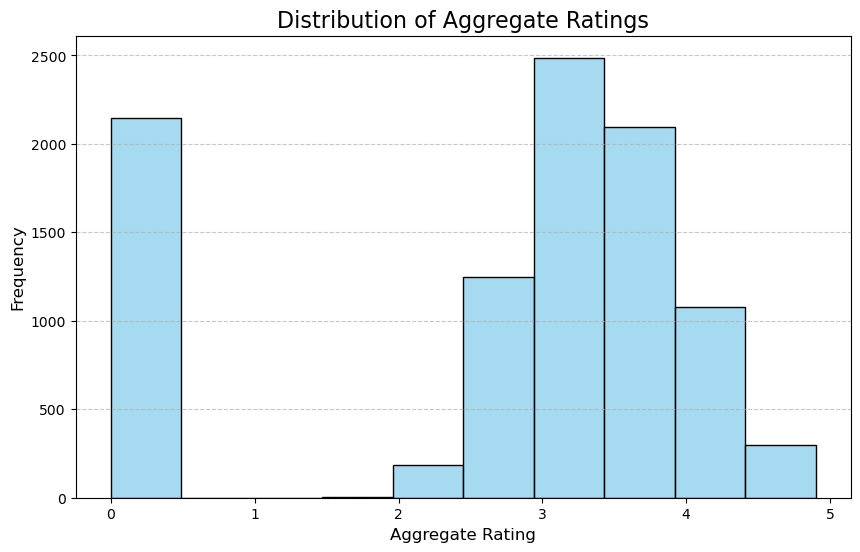

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
ratings = df1['Aggregate rating']

# Plot the distribution of aggregate ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings, bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Insights: 

In [4]:
rr=df1['Aggregate rating'].value_counts()

In [5]:
rr

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

Here we are getting 0.0 as a common rating range. So we can use pd.cut() to divide the ratings into range.

In [6]:
most_common_ranges = pd.cut(ratings, bins=10).value_counts()
most_common_ranges

Aggregate rating
(2.94, 3.43]       2487
(-0.0049, 0.49]    2148
(3.43, 3.92]       2096
(2.45, 2.94]       1247
(3.92, 4.41]       1078
(4.41, 4.9]         300
(1.96, 2.45]        183
(1.47, 1.96]          3
(0.49, 0.98]          0
(0.98, 1.47]          0
Name: count, dtype: int64

In [7]:
most_common_ranges = pd.cut(ratings, bins=10).value_counts().idxmax()
most_common_ranges

Interval(2.94, 3.43, closed='right')

 The most common rating range is 2.94, 3.43

In [8]:
# Calculate the average number of votes received by restaurants
average_votes = df1['Votes'].mean()
average_votes


156.7720603647034

The average number of votes received by restaurants: 156.7720603647034


## Task 2: Cuisine Combination

Identify the most common combinations of
cuisines in the dataset.

Determine if certain cuisine combinations
tend to have higher ratings. 

In [9]:
# the most common combinations of cuisines in the dataset.

import pandas as pd
cuisine_combinations = df1['Cuisines'].value_counts()
print("Most common cuisine combinations:\n", cuisine_combinations)

Most common cuisine combinations:
 Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64


In [10]:
top10=cuisine_combinations.head(10) # Top 10 most common combinations
print("Most 10 common cuisine combinations:\n", top10)


Most 10 common cuisine combinations:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [11]:
#Determine if certain cuisine combinations tend to have higher ratings.
cuisines_ratings = df1[['Cuisines', 'Aggregate rating']]
cuisines_ratings

,Cuisines,Aggregate rating
0,"French, Japanese, Desserts",4.8
1,Japanese,4.5
2,"Seafood, Asian, Filipino, Indian",4.4
3,"Japanese, Sushi",4.9
4,"Japanese, Korean",4.8
...,...,...
9537,Turkish,4.1
9538,"World Cuisine, Patisserie, Cafe",4.2
9539,"Italian, World Cuisine",3.7
9540,Restaurant Cafe,4.0


In [12]:
cuisine_rating_avg = cuisines_ratings.groupby('Cuisines')['Aggregate rating'].mean()
sorted_cuisine_ratings = cuisine_rating_avg.sort_values(ascending=False)
print("Cuisine combinations with the highest ratings:\n", sorted_cuisine_ratings.head(10))

Cuisine combinations with the highest ratings:
 Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


## Task 3 : Geographic Analysis 
Plot the locations of restaurants on a map using longitude and latitude coordinates.

Identify any patterns or clusters of restaurants in specific areas.

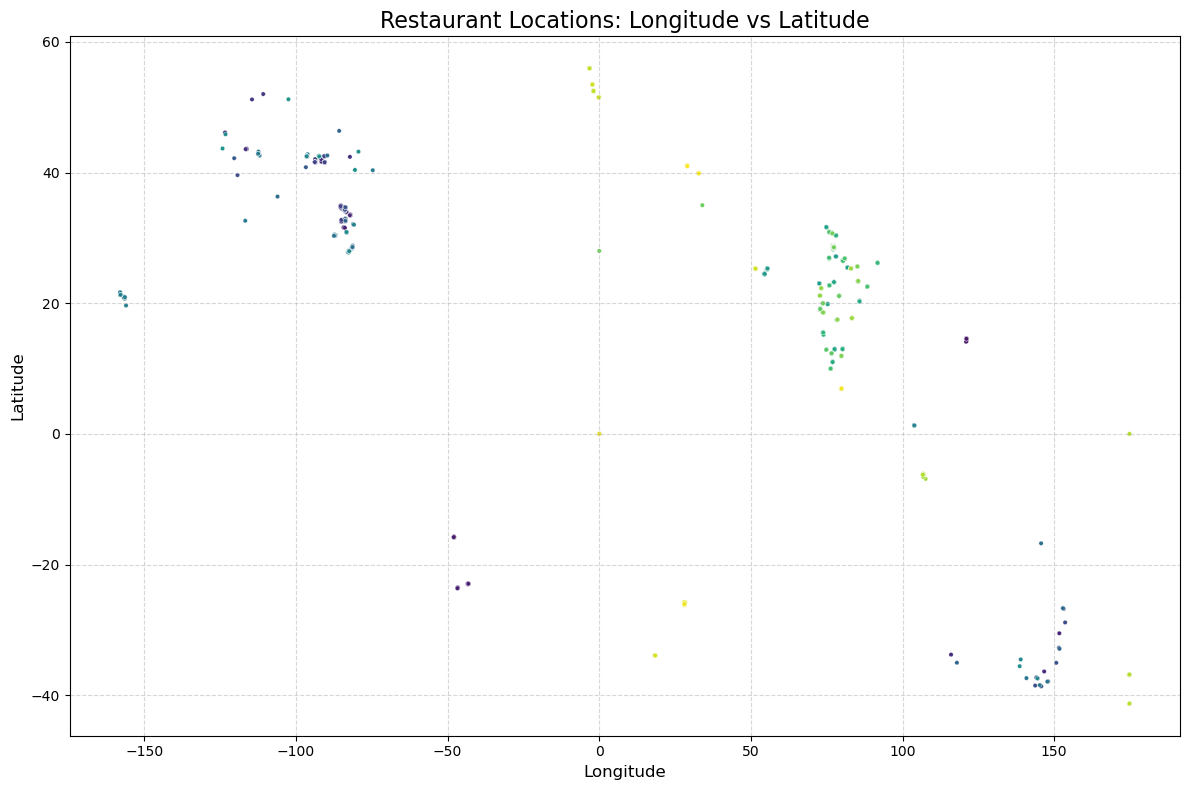

In [13]:
#Plot the locations of restaurants on a map using longitude and latitude coordinates.

import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df1['Longitude'],
    y=df1['Latitude'],
    hue=df1['City'],  # color by city
    palette='viridis',
    s=10,  # Size of points(data)
    legend=None  # I Disabled legend for clarity in large datasets
)

plt.title('Restaurant Locations: Longitude vs Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


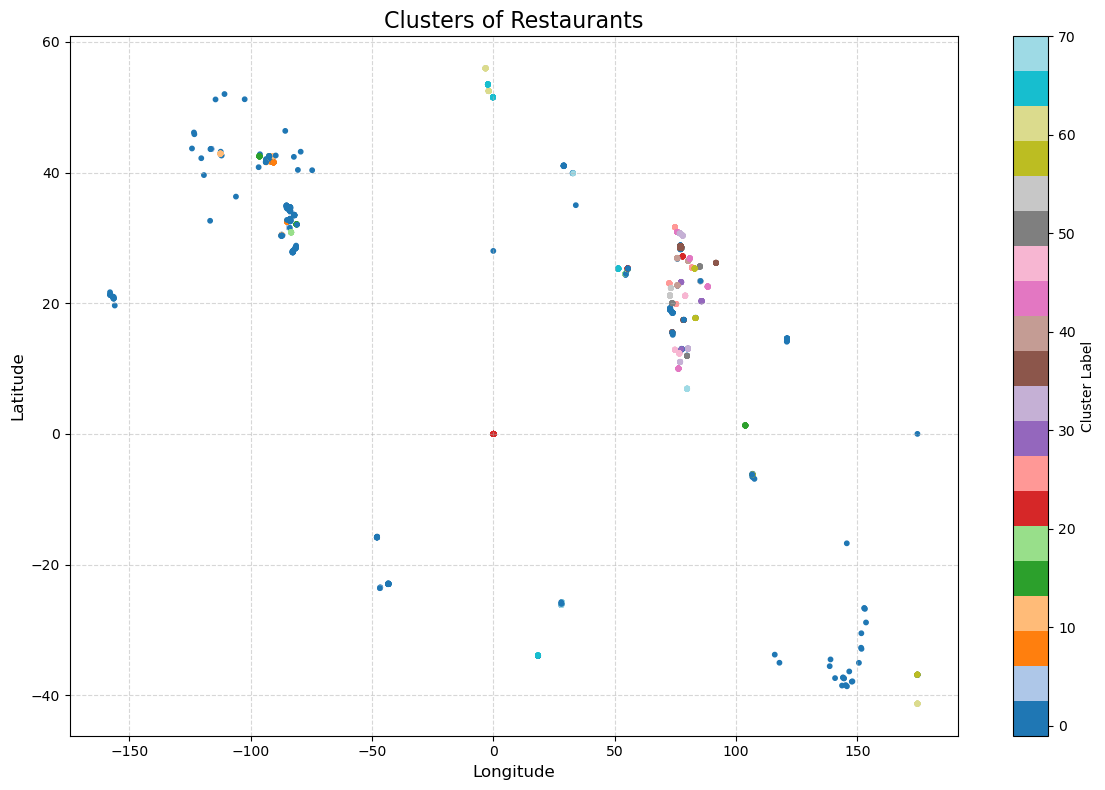

In [14]:
#patterns or clusters of restaurants in specific areas.
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Extract coordinates
coordinates = df1[['Longitude', 'Latitude']].values

# Apply dbscan
dbscan = DBSCAN(eps=0.05, min_samples=10, metric='euclidean')  
clusters = dbscan.fit_predict(coordinates)

# Add cluster labels to the dataset
df1['cluster'] = clusters

# Step 4: Plot clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df1['Longitude'], 
    df1['Latitude'], 
    c=df1['cluster'], 
    cmap='tab20', 
    s=10
)

plt.title('Clusters of Restaurants', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(scatter, label='Cluster Label')
plt.tight_layout()

plt.show()


## Task 4 : Restaurant Chains

Identify if there are any restaurant chains present in the dataset.

Analyze the ratings and popularity of different restaurant chains.

In [15]:
# The restaurant chains present in the dataset.

# Count occurrences of each restaurant name
chain_counts = df1['Restaurant Name'].value_counts()

# Filter for chains (restaurants with more than one outlet)
restaurant_chains = chain_counts[chain_counts > 1]

# Display the restaurant chains
print(restaurant_chains)


Restaurant Name
Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
                                  ..
Zaika Kathi Rolls                  2
The Night Owl                      2
The Cheesecake Factory             2
New Kadimi                         2
Ceviche Tapas Bar & Restaurant     2
Name: count, Length: 734, dtype: int64


In [16]:
#Analyze the ratings and popularity of different restaurant chains.

# Filtering the dataset for chains
chains_data = df1[df1['Restaurant Name'].isin(restaurant_chains.index)]

# Grouping by restaurant name to calculate metrics
chain_analysis = chains_data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).reset_index()

# Rename columns for clarity
chain_analysis.columns = ['Restaurant Name', 'Average Rating', 'Total Votes']
# Sort by popularity (total votes) and rating
chain_analysis = chain_analysis.sort_values(by=['Total Votes', 'Average Rating'], ascending=False)
print(chain_analysis)


               Restaurant Name  Average Rating  Total Votes
62             Barbeque Nation        4.353846        28142
7    AB's - Absolute Barbecues        4.825000        13400
79                   Big Chill        4.475000        10853
239                 Farzi Cafe        4.366667        10098
692                   Truffles        3.950000         9682
..                         ...             ...          ...
440           Murliwala Bakers        0.000000            0
538        Rajdhani Restaurant        0.000000            0
616                Street Cafe        0.000000            0
645              The Big Scoop        0.000000            0
713               Whatslife.in        0.000000            0

[734 rows x 3 columns]


Conclusion:

The analysis of the restaurant dataset has provided valuable insights into the restaurant industry across various dimensions.
The study highlights critical areas of interest for restaurant stakeholders, from customer preferences and pricing strategies to geographic planning and operational efficiencies. This helps in data-driven decision-making for businesses, enabling them to achieve long-term growth.